## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Modelling
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from xgboost import XGBRegressor

#### Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv('data/students.csv')

#### Show Top 5 Records

In [3]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y variables

In [4]:
# Dropping math_score column and then adding it at the end
math_score = df.pop('math_score')
df['math_score'] = math_score

# Creating dependent and independent variables
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [5]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [6]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [7]:
# Check all categorical variables distribution
for column in df.select_dtypes(include='object').columns:
    print(df[column].value_counts())
    print()

gender
female    518
male      482
Name: count, dtype: int64

race_ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental_level_of_education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64

lunch
standard        645
free/reduced    355
Name: count, dtype: int64

test_preparation_course
none         642
completed    358
Name: count, dtype: int64



In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 7), (200, 7), (800,), (200,))

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Create variables for categorical columns and numerical columns
numerical_columns = X.select_dtypes(exclude='object').columns
categorical_columns = X.select_dtypes(include='object').columns

# Create oject of OneHotEncoder and StandardScaler
scaler = StandardScaler()
encoder = OneHotEncoder()

# Create object of ColumnTransformer
preprocessor = ColumnTransformer(
    [
        ('StandardScaler', scaler, numerical_columns),
        ('OneHotEncoder', encoder, categorical_columns)
    ]
)

In [10]:
# Fit and transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Check the shape of the data
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [11]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.030791,0.434053,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.930290,0.964701,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.345443,1.163694,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,-0.176786,-0.162925,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,-0.384363,-0.759904,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


#### Create an Evaluate Function to give all metrics after model Training

In [12]:
# Create a function to evaluate the model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [ ]:
# Create a dictionary of models
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "AdaBoost Regressor": AdaBoostRegressor()
}

# Create empty lists to store the model name and its performance
model_list = []
r2_list =[]

# Loop through the models dictionary and evaluate the model performance
for i in range(len(list(models))):
    # Get the model
    model = list(models.values())[i]
    
    # Fit the model
    model.fit(X_train, y_train)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae, mode_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    # Print the model name
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    # Print the model performance
    print('Model Performance for Training set')
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- Mean Squared Error: {:.4f}".format(mode_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print("- Adjusted R2 Score: {:.4f}".format(1 - (1-model_train_r2)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)))

    print('-'*55)
    
    print('Model Performance for Test set')
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    print("- Adjusted R2 Score: {:.4f}".format(1 - (1-model_test_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)))
    
    # Append the R2 score to the list
    r2_list.append(model_test_r2)
    
    print('='*55)
    print('\n')

Linear Regression
Model Performance for Training set
- Mean Absolute Error: 4.2667
- Mean Squared Error: 28.3349
- Root Mean Squared Error: 5.3231
- R2 Score: 0.8743
- Adjusted R2 Score: 0.8713
-------------------------------------------------------
Model Performance for Test set
- Mean Absolute Error: 4.2148
- Mean Squared Error: 29.0952
- Root Mean Squared Error: 5.3940
- R2 Score: 0.8804
- Adjusted R2 Score: 0.8678


Lasso
Model Performance for Training set
- Mean Absolute Error: 5.2053
- Mean Squared Error: 43.4611
- Root Mean Squared Error: 6.5925
- R2 Score: 0.8072
- Adjusted R2 Score: 0.8025
-------------------------------------------------------
Model Performance for Test set
- Mean Absolute Error: 5.1557
- Mean Squared Error: 42.4756
- Root Mean Squared Error: 6.5173
- R2 Score: 0.8254
- Adjusted R2 Score: 0.8070


Ridge
Model Performance for Training set
- Mean Absolute Error: 4.2650
- Mean Squared Error: 28.3377
- Root Mean Squared Error: 5.3233
- R2 Score: 0.8743
- Adjusted

### Results

In [14]:
# Create a DataFrame of model performance and sort it by R2 Score
pd.DataFrame(list(zip(model_list, r2_list)), 
             columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880592
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852707
7,AdaBoost Regressor,0.847556
1,Lasso,0.825447
6,XGBRegressor,0.821221
3,K-Neighbors Regressor,0.783968
4,Decision Tree,0.740033


## Linear Regression

In [15]:
# Implementing Linear Regression Model
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.04


## Plot y_pred and y_test

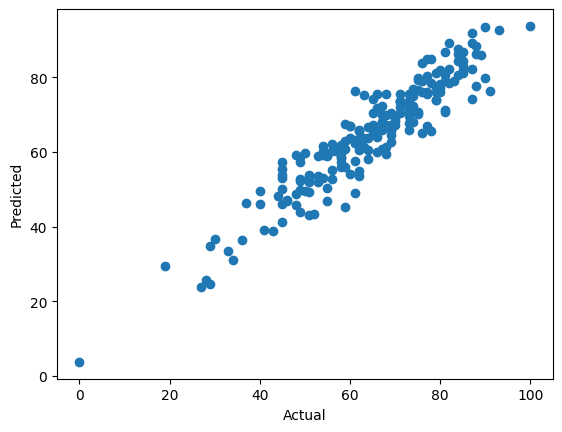

In [16]:
# Plotting the Actual vs Predicted
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted');

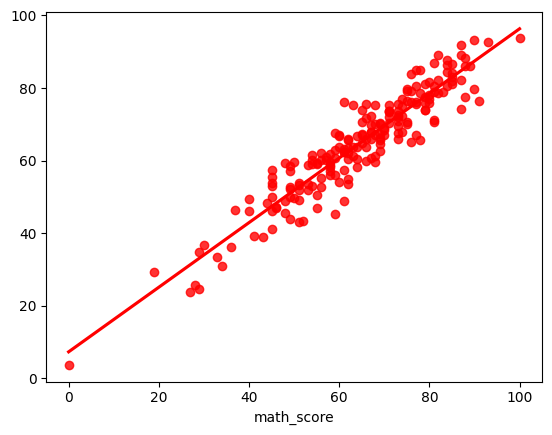

In [17]:
# Plotting the Actual vs Predicted with regression line
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [18]:
# Creating a DataFrame of Actual and Predicted values
pred_df = pd.DataFrame({'Actual Value':y_test,
                        'Predicted Value':y_pred,
                        'Difference':y_test-y_pred})

# Displaying the DataFrame
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
